In [1]:
# Set up imports
import numpy as np
from scipy import signal
from scipy import misc
from tqdm import tqdm
import time
import matplotlib.pyplot as plt

### 2d cross correlation - an overview

Cross correlation is a technique for comparing two different pieces of data, and seeing how well they match up.  For example, if we have two images, we can use cross correlation to determine how close two images are.

As you might be aware, images are 2d arrays of values, where each value encodes the color value.  So one way we can see if one image occurs in another, is by checking how close the values between images are.  The way we check the 'closeness' is by calculating the correlation between two images.  In this case, we want to see if one image is contained in another.

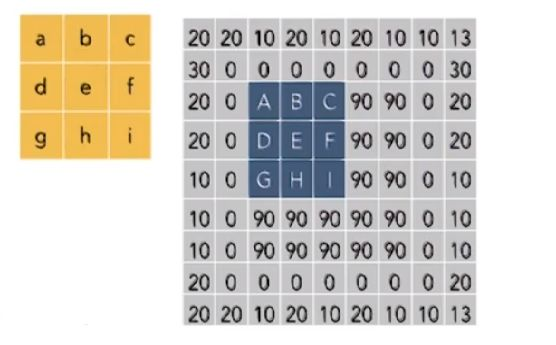


In the above example, we want to find where the yellow image occurs in the gray image.  That means we have to scan across the gray image, and calculate the correlation at almost every location to see where it occurs.  We can calculate correlation by performing element-wise multiplication between the two images, and summing them together.  Larger values indicate higher correlation, lower values indicate lower correlation.  This doesn't always work perfectly (correlation biased towards larger pixel values), but it suffices for our examples.


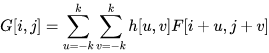
The above equation is just the mathematical way of representing the correlation calculation at each position in the larger image.

#### Problem: Finding the Racoon's right eye
In this problem, we have two images.  The first is an image of a raccoon, and the second is of the raccoon's right eye.  We want to identify where in the image this eye occurs.

/home/tuscan-chicken/Documents/LACC/venv/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


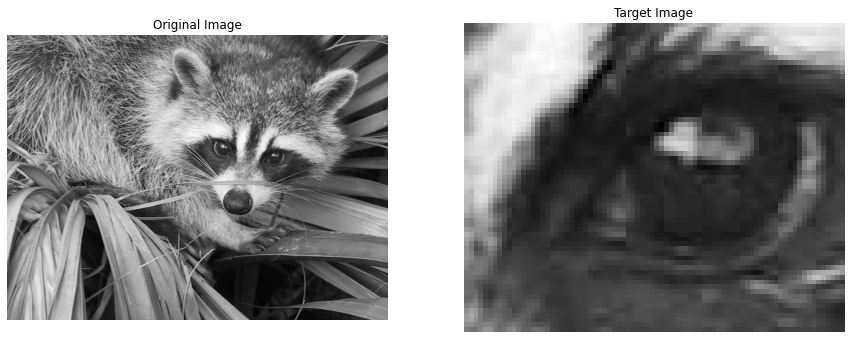

In [5]:
# Get the images of the raccoon and its eye
face = misc.face(gray=True) - misc.face(gray=True).mean()
template = np.copy(face[300:365, 670:750])  # right eye
template -= template.mean()

# Plot the images
fig, (ax_orig, ax_template) = plt.subplots(1, 2,
                                                    figsize=(15, 30))
ax_orig.imshow(face, cmap='gray')

ax_orig.set_title('Original Image')

ax_orig.set_axis_off()

ax_template.imshow(template, cmap='gray')

ax_template.set_title('Target Image')

ax_template.set_axis_off()

fig.show()

### 2d correlation from 3rd party library

Scipy, a 3rd party Python library, already has a method for performing cross correlation on images.  You can see the results below.  Though it's kind of small, the white values indicate the regions with highest correlation.

Running Time: 4.820758 seconds


/home/tuscan-chicken/Documents/LACC/venv/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


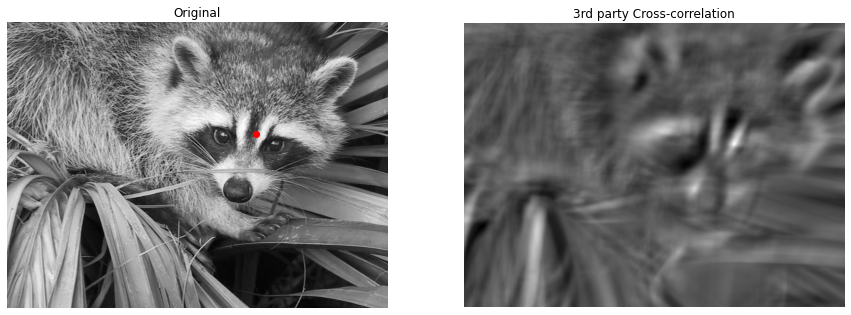

In [8]:
# Use the 3rd party function for performing correlation
tstart = time.time()
corr = signal.correlate2d(face, template, mode='valid')
print("Running Time: %f seconds" % (time.time() - tstart))

# Plot where the on the face we find the maximum correlation (shown as whitest region)
y, x = np.unravel_index(np.argmax(corr), corr.shape)
import matplotlib.pyplot as plt

fig, (ax_orig, ax_corr) = plt.subplots(1, 2,

                                                    figsize=(15, 30))
ax_orig.imshow(face, cmap='gray')

ax_orig.set_title('Original')

ax_orig.set_axis_off()

ax_corr.imshow(corr, cmap='gray')

ax_corr.set_title('3rd party Cross-correlation')

ax_corr.set_axis_off()

ax_orig.plot(x, y, 'ro')

fig.show()

### 2d correlation - your turn!

Now you will try out performing this correlation calculation.  Keep in mind that your result correlation matrix should be smaller than the face matrix.  If this point is confusing, think of it like this: let's say you have two of the yellow matrices as shown in the overview.  If you calculated the correlation for these two matrices, you would only get 1 value, even though the matrices are both 3x3.  

However, let's say you now want to calculate the correlation between the yellow matrix (3x3) and the larger gray matrix (9x9).  That means that you will end up with a 7x7 correlation grid.  Why? This is because you are calculating a correlation for every 3x3 matrix that you can fit inside that gray matrix.  For example, ask yourself this question: how many 3x3 matrices can we fit by sliding them left to right on the gray matrix?  7 right?  Similarly, you can do the same intuitive experiment when you slide them up and down and end up with 7 matrices again.  That means you can fit 7x7 yellow matrices inside the gray matrix, and that's how many correlation values you get. 

In [15]:
def multiply_sum(x1, x2):
    """Performs element wise multiplication for both matrices

    Args:
      x1: a numpy 2d matrix of the same size as the template (65, 80)
      x2: a numpy 2d matrix, which is the same shape as x1

    Returns:
      A single value representing the element-wise product, summed together.

    """
    
    #####################################

    return np.sum(np.multiply(x1, x2))

    #####################################



def correlation_2d(face, template):    
    """Performs cross correlation between the 2d face matrix and the template
        The key here is that we must calculate the 'multiply_sum' function
        many times, so that we get a grid of correlation values.
        Basically, calculate the correlation for every template that you can fit in the face matrix.

    Args:
      face: a large 2d matrix, of size (768, 1024)
      template: a subimage of the face matrix (65,80)

    Returns:
        A 2d matrix of correlation values ( should be of size (704,945) )

    """
    
    #####################################
    
    
    row_bound = face.shape[0] - template.shape[0] + 1
    col_bound = face.shape[1] - template.shape[1] + 1
    result = np.zeros((row_bound, col_bound))

    # Iterate through elements in the face
    for i in tqdm(range(row_bound)):
        for j in range(col_bound):

            # Iterate through elements in the kernel
            x_input = face[i:i+template.shape[0],j:j+template.shape[1]]
            result[i,j] = multiply_sum(x_input, template)

            # Performing the full for loop
            # for k in range(template.shape[0]):
            #     for l in range(template.shape[1]):
            #         result[i,j] += face[i+k,j+l]*template[k,l]
            
    return result
            
    #####################################
    

result = correlation_2d(face, template)

100%|██████████| 704/704 [00:05<00:00, 119.98it/s]


/home/tuscan-chicken/Documents/LACC/venv/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


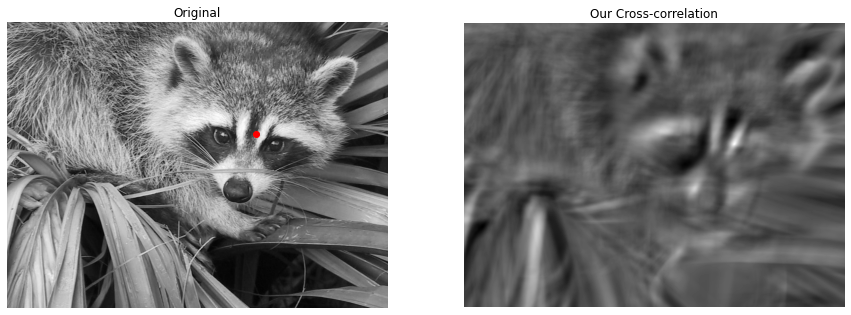

In [16]:
y, x = np.unravel_index(np.argmax(result), result.shape)  # find the match
import matplotlib.pyplot as plt

fig, (ax_orig, ax_result) = plt.subplots(1, 2,

                                                    figsize=(15, 30))
ax_orig.imshow(face, cmap='gray')

ax_orig.set_title('Original')

ax_orig.set_axis_off()

ax_result.imshow(result, cmap='gray')

ax_result.set_title('Our Cross-correlation')

ax_result.set_axis_off()

ax_orig.plot(x, y, 'ro')

fig.show()